In [1]:
%load_ext autoreload
%autoreload

#### Prepare Dataset

In [2]:
import tensorflow_datasets as tfds

import deeply.datasets as dd
from deeply.datasets.util import split as split_dataset
from deeply.generators import DatasetGenerator

In [3]:
cifar10, info = dd.load("cifar10", with_info = True)

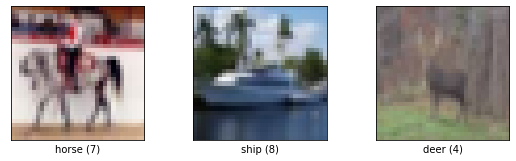

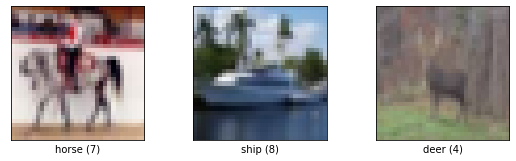

In [4]:
tfds.show_examples(cifar10["train"].take(3), ds_info = info)

In [5]:
input_shape = info.features["image"].shape
batch_size  = 64
epochs      = 10

In [6]:
def mapper(ds):
    return ds["image"], ds["label"]

In [7]:
train, val = list(map(lambda x: DatasetGenerator(x, batch_size = batch_size, mapper = mapper),
                                                 split_dataset(cifar10["train"], splits = (0.7, 0.3))))
test = DatasetGenerator(cifar10["test"], mapper = mapper)

#### Build Model

In [8]:
from deeply.model.dam import DAM

In [9]:
dam = DAM(input_shape = input_shape)

ValueError: Input size must be at least 75x75; got `input_shape=(32, 32, 3)`

In [10]:
dam.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [11]:
steps_per_epoch  = len(train) // batch_size
validation_steps = len(val)   // batch_size

In [ ]:
dam.fit(train, validation_data = val, verbose = 2, epochs = epochs,
        steps_per_epoch  = steps_per_epoch,
        validation_steps = validation_steps)